Q1. What is the purpose of grid search cv in machine learning, and how does it work?

Ans: Grid search cross-validation (GridSearchCV) is a technique used in machine learning to find the optimal hyperparameters for a model. Hyperparameters are the configuration settings of a model that are not learned from the data but need to be specified by the practitioner. Examples include the learning rate in gradient boosting or the regularization parameter in logistic regression.

The purpose of GridSearchCV is to systematically search through a predefined set of hyperparameter values, evaluating the performance of the model for each combination through cross-validation. The goal is to identify the hyperparameter values that result in the best model performance.

Here's how GridSearchCV works:

1) Define Hyperparameter Grid:

Specify a grid of hyperparameter values that you want to search over. This grid represents all the combinations of hyperparameters that you want to evaluate.

2) Cross-Validation:

Divide the training data into k folds (where k is the number of folds specified, e.g., 5 or 10).
For each combination of hyperparameters in the grid:
Train the model on k-1 folds.
Validate the model on the remaining fold.
Repeat this process for each fold, and average the performance metrics.

3) Model Evaluation:

Use a performance metric (e.g., accuracy, precision, recall, F1 score) to evaluate the model for each combination of hyperparameters.

4) Select Best Hyperparameters:

Identify the hyperparameters that result in the best model performance based on the chosen evaluation metric.

5) Train Final Model:

Optionally, train the final model using the best hyperparameters on the entire training dataset.
GridSearchCV is typically used in conjunction with cross-validation to ensure that the model's performance is robust and not dependent on the specific training/test split. This helps in reducing the risk of overfitting to a particular subset of the data.

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# Create a model (SVM in this case)
model = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

In [2]:
best_params

{'C': 1, 'gamma': 0.1}

Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose
one over the other?

Ans: Both Grid Search Cross-Validation (GridSearchCV) and Randomized Search Cross-Validation (RandomizedSearchCV) are techniques used for hyperparameter tuning, but they differ in how they explore the hyperparameter space. Here are the key differences and considerations for choosing one over the other:

~ Grid Search Cross-Validation (GridSearchCV):

1) Search Strategy:

Exhaustive: Grid search explores all possible combinations of hyperparameter values specified in a predefined grid.

2) Computational Cost:

Higher: Grid search can be computationally expensive, especially when the hyperparameter space is large or when the model training is resource-intensive.

3) Hyperparameter Space:

Regular Grid: Grid search explores a regular grid of hyperparameter values, which is explicitly defined by the user.

5) Use Case:

Small Hyperparameter Space: Grid search is suitable when the hyperparameter space is relatively small and the computational cost is manageable.

6) Precision:

High Precision: Grid search is precise but may be less efficient in terms of computation compared to randomized search.

~ Randomized Search Cross-Validation (RandomizedSearchCV):

1) Search Strategy:

Random Sampling: Randomized search randomly samples a specified number of hyperparameter combinations from the given hyperparameter space.

2) Computational Cost:

Lower: Randomized search is generally less computationally expensive than grid search since it doesn't explore all possible combinations.

3) Hyperparameter Space:

User-Defined Range: Similar to grid search, the user specifies the hyperparameter space, but randomized search samples randomly from this space.

4) Use Case:

Large Hyperparameter Space: Randomized search is beneficial when the hyperparameter space is large, and an exhaustive search is impractical due to computational constraints.

5) Precision:

Sacrifices Precision for Efficiency: Randomized search may not explore all combinations but provides a more efficient way of finding good hyperparameter values.

~ When to Choose One Over the Other:

* Grid Search:

When the hyperparameter space is relatively small.

When computational resources are not a significant constraint.

When a more comprehensive search is desired, and there is a need for precise tuning.

* Randomized Search:

When the hyperparameter space is large, and exploring all combinations is computationally expensive.

When there is a need for a quick and efficient search.

When the exact configuration of hyperparameters is less critical, and there is room for exploration.

In practice, the choice between grid search and randomized search depends on the specific characteristics of the problem, the computational resources available, and the trade-off between precision and efficiency. Sometimes, a combination of both methods is used, starting with a randomized search to narrow down the search space, followed by a more focused grid search around promising regions.

Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Ans: Data leakage, also known as leakage or information leakage, refers to the situation in which information from outside the training dataset is used to create a model. This unintentional use of information can lead to overly optimistic performance estimates during training but may result in poor generalization to new, unseen data. Data leakage can significantly undermine the integrity and reliability of a machine learning model.

Causes of Data Leakage:

1) Including Future Information:

When features derived from the target variable or time-dependent data are inadvertently included in the training set. For example, predicting stock prices using future stock prices.

2) Incorporating Test Set Information:

Using information from the test set during training. This might happen if the training and test sets are not properly separated, and the model unintentionally learns patterns specific to the test set.

3) Leaking Information from Other Samples:

When features are derived from information that would not be available at the time of prediction, such as using aggregate statistics that include the target variable for the current sample.

4) Data Preprocessing Errors:

Mistakes in data preprocessing steps, such as scaling or imputation, where information from the entire dataset is used during preprocessing, leading to leakage.

~ Why Data Leakage is a Problem:

1) Overestimated Model Performance:

Data leakage can result in overly optimistic performance estimates during training, leading to the selection of models that do not generalize well to new, unseen data.

2) Poor Generalization:

Models trained on leaked information may fail to generalize to real-world scenarios, as they have learned patterns specific to the training dataset.

3) Unrealistic Expectations:

Stakeholders may have unrealistic expectations about the model's performance based on inflated training metrics, leading to disappointment when the model is deployed.

~ Example of Data Leakage:
Consider a credit card fraud detection scenario:

1) Data Leakage Scenario:

Feature Creation: The dataset includes a feature that represents the number of fraudulent transactions for each customer.

Time Frame: The dataset spans several years.

Data Leakage: If this feature is included in the training set and used to train the model, the model might learn that customers who have experienced fraud in the past are more likely to experience fraud in the future.

Issue: This creates a data leakage issue because, in a real-world scenario, the model should not have access to future information (whether a customer will experience fraud in the future) at the time of prediction.

2) Consequences:

The model may appear to perform well during training, as it is essentially learning to recognize past instances of fraud.

However, when applied to new data, the model may perform poorly because it has learned patterns that do not generalize.

Q4. How can you prevent data leakage when building a machine learning model?

Ans: ~ How to Address Data Leakage:

1) Understand the Data:

Have a deep understanding of the data and the problem domain to identify potential sources of leakage.
Proper Cross-Validation:

Use proper cross-validation techniques to ensure that information from the validation or test set does not influence the training process.

2) Feature Engineering Awareness:

Be cautious when creating features and avoid incorporating information that would not be available at the time of prediction.

3) Time-Based Splitting:

In time-series data, split the data in a way that reflects the temporal order of the observations. The training set should precede the validation and test sets.

4) Data Preprocessing:

Be careful with data preprocessing steps, ensuring that any scaling, imputation, or other transformations are done based only on the information available in the training set.

5) Regularly Monitor and Update:

Regularly monitor the model's performance and update it as needed. As new data becomes available, reevaluate the model to ensure it remains effective.
Addressing data leakage is crucial for building reliable and robust machine learning models that generalize well to new, unseen data.

Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

Ans: A confusion matrix is a table that is often used to evaluate the performance of a classification model. It provides a summary of the predicted and actual class labels for a set of data points, allowing for a detailed analysis of the model's performance. The confusion matrix is especially useful when dealing with binary (two-class) or multiclass classification problems.

Here are the components of a confusion matrix:

True Positive (TP): The number of instances where the model correctly predicted the positive class.

True Negative (TN): The number of instances where the model correctly predicted the negative class.

False Positive (FP): The number of instances where the model incorrectly predicted the positive class (Type I error).

False Negative (FN): The number of instances where the model incorrectly predicted the negative class (Type II error).

Confusion Matrix for Binary Classification: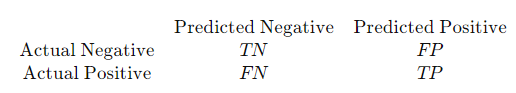
 
~ Key Metrics Derived from the Confusion Matrix:

1) Accuracy: 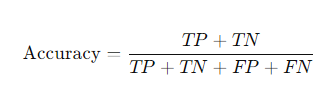

Measures the overall correctness of the model's predictions.

2) Precision (Positive Predictive Value): 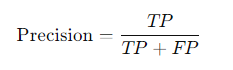

Measures the accuracy of positive predictions. It answers the question: Of all instances predicted as positive, how many were actually positive?

3) Recall (Sensitivity or True Positive Rate): 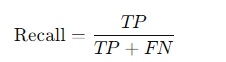

Measures the ability of the model to capture all the positive instances. It answers the question: Of all actual positive instances, how many were correctly predicted?

4) Specificity (True Negative Rate): 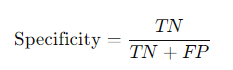

Measures the ability of the model to capture all the negative instances. It answers the question: Of all actual negative instances, how many were correctly predicted?

5) F1 Score: 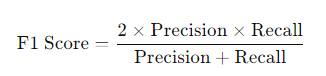
 
The harmonic mean of precision and recall, providing a balanced measure of the two.

* Interpretation of Confusion Matrix:

True Positive (TP): Instances correctly predicted as positive.

True Negative (TN): Instances correctly predicted as negative.

False Positive (FP): Instances incorrectly predicted as positive.

False Negative (FN): Instances incorrectly predicted as negative.

The confusion matrix and the derived metrics provide a more nuanced understanding of a classification model's performance beyond simple accuracy. They help identify the types and frequencies of errors made by the model, allowing practitioners to assess trade-offs between different metrics based on the specific goals and requirements of the application.

Q6. Explain the difference between precision and recall in the context of a confusion matrix.

Ans: Precision and recall are two key metrics derived from a confusion matrix in the context of classification. They provide insights into the performance of a model, particularly when dealing with imbalanced datasets.

* Precision:

Precision, also known as Positive Predictive Value, measures the accuracy of positive predictions made by the model. It answers the question: Of all instances predicted as positive, how many were actually positive?

True Positive (TP): Instances correctly predicted as positive.

False Positive (FP): Instances incorrectly predicted as positive.

High precision indicates that when the model predicts the positive class, it is likely correct. Precision is especially important when the cost of false positives is high, and there is a need to minimize the number of false positives.

* Recall:

Recall, also known as Sensitivity or True Positive Rate, measures the ability of the model to capture all the positive instances. It answers the question: Of all actual positive instances, how many were correctly predicted by the model?

True Positive (TP): Instances correctly predicted as positive.

False Negative (FN): Instances incorrectly predicted as negative.

High recall indicates that the model is effective at identifying most of the positive instances. Recall is particularly important when the cost of false negatives is high, and there is a need to minimize the number of instances that are missed.

* Precision vs. Recall Trade-off:

Balancing Act:

Precision and recall are often in tension with each other. Improving precision may lower recall, and vice versa.
High Precision:

Useful when the cost of false positives is high (e.g., in medical diagnoses, where a false positive result may lead to unnecessary treatments).
High Recall:

Useful when the cost of false negatives is high (e.g., in fraud detection, where missing a fraudulent transaction is more critical than a false positive alert).

* F1 Score:

The F1 score is a metric that combines precision and recall into a single value, providing a balanced measure of both. It is the harmonic mean of precision and recall:

The F1 score is particularly useful when there is a need to balance precision and recall, and it becomes essential to consider both false positives and false negatives.

In summary, precision and recall are complementary metrics that offer a more comprehensive understanding of a classification model's performance, especially in situations where imbalanced class distributions or asymmetric costs exist. Practitioners need to carefully choose the metric that aligns with the specific goals and requirements of the application.

Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

Ans: Interpreting a confusion matrix involves analyzing the different components of the matrix to understand the types of errors that a classification model is making. A confusion matrix provides a detailed breakdown of predicted and actual class labels, allowing practitioners to identify specific areas where the model may be struggling. Here's how you can interpret a confusion matrix:

* Components of a Confusion Matrix:

True Positive (TP):Instances correctly predicted as positive.

True Negative (TN):Instances correctly predicted as negative.

False Positive (FP):Instances incorrectly predicted as positive (Type I error).

False Negative (FN):Instances incorrectly predicted as negative (Type II error).

* Interpreting Different Types of Errors:
~ False Positives (FP):

Interpretation:
Instances that were predicted as positive but are actually negative.

~ Implication:
The model is making false positive errors, indicating instances where it incorrectly predicts the positive class.

~ Potential Impact:
False positives may lead to unnecessary actions or interventions if the positive class is associated with a significant cost.

~ False Negatives (FN):

~ Interpretation:
Instances that were predicted as negative but are actually positive.

~ Implication:
The model is making false negative errors, indicating instances where it fails to predict the positive class.

~ Potential Impact:
False negatives may have more serious consequences if the positive class is associated with critical outcomes that should be identified.

~ True Positives (TP):

~ Interpretation:
Instances that were correctly predicted as positive.

~ Implication:
The model is correctly identifying positive instances.

~ Potential Impact:
Positive instances are correctly identified, contributing to the model's overall effectiveness.

~ True Negatives (TN):

~ Interpretation:

Instances that were correctly predicted as negative.

~ Implication:
The model is correctly identifying negative instances.

~ Potential Impact:
Negative instances are correctly identified, contributing to the model's overall effectiveness.
Actionable Steps Based on Confusion Matrix Analysis:

~ Improve Precision:

If the model has high false positives (FP), focus on improving precision.
Strategies: Adjust classification threshold, feature engineering, or consider using algorithms that provide better precision.
Improve Recall:

If the model has high false negatives (FN), focus on improving recall.
Strategies: Adjust classification threshold, feature engineering, or consider using algorithms that provide better recall.
Threshold Adjustment:

Adjusting the classification threshold can impact the trade-off between precision and recall. A lower threshold increases recall but may decrease precision, and vice versa.
Feature Engineering:

Analyze the features used by the model and consider feature engineering to improve discrimination between classes.
Algorithm Selection:

Depending on the nature of errors, consider trying different classification algorithms that may be more suitable for the specific characteristics of the data.
Cost-Benefit Analysis:

Consider the costs associated with false positives and false negatives and choose a model or threshold that aligns with the desired balance.
Interpreting a confusion matrix is a critical step in model evaluation and refinement. It guides the improvement process by identifying areas where the model may need adjustments to better meet the goals of the application. Understanding the specific types of errors can inform actionable steps to enhance the model's performance.

Q8. What are some common metrics that can be derived from a confusion matrix, and how are they
calculated?

Ans: A confusion matrix is a table that is often used to evaluate the performance of a classification model. It provides a summary of the predicted and actual class labels for a set of data points, allowing for a detailed analysis of the model's performance. The confusion matrix is especially useful when dealing with binary (two-class) or multiclass classification problems.

Here are the components of a confusion matrix:

True Positive (TP): The number of instances where the model correctly predicted the positive class.

True Negative (TN): The number of instances where the model correctly predicted the negative class.

False Positive (FP): The number of instances where the model incorrectly predicted the positive class (Type I error).

False Negative (FN): The number of instances where the model incorrectly predicted the negative class (Type II error).

Confusion Matrix for Binary Classification: ![image.png](attachment:9eb685f3-5b1e-46b4-b082-58d105fb3c9c.png)
 
~ Key Metrics Derived from the Confusion Matrix:

1) Accuracy:  
![image.png](attachment:b5625357-3ce2-4a0b-bac4-ecdb99a6043f.png)

Measures the overall correctness of the model's predictions.

2) Precision (Positive Predictive Value):  
![image.png](attachment:e4a3b9cd-b321-4a6a-8276-8b8133d0ea2d.png)

Measures the accuracy of positive predictions. It answers the question: Of all instances predicted as positive, how many were actually positive?

3) Recall (Sensitivity or True Positive Rate):
![image.png](attachment:b0f6718f-2dc1-40f7-8d4d-2b38cedfcc95.png)

Measures the ability of the model to capture all the positive instances. It answers the question: Of all actual positive instances, how many were correctly predicted?

4) Specificity (True Negative Rate): 

![image.png](attachment:a901e11c-f2b8-4e79-afa6-371e7c469d47.png)

Measures the ability of the model to capture all the negative instances. It answers the question: Of all actual negative instances, how many were correctly predicted?

5) F1 Score: 
![image.png](attachment:89ef338d-27d2-41dc-b34e-7cb592a9680a.png)
 
The harmonic mean of precision and recall, providing a balanced measure of the two.

* Interpretation of Confusion Matrix:

True Positive (TP): Instances correctly predicted as positive.

True Negative (TN): Instances correctly predicted as negative.

False Positive (FP): Instances incorrectly predicted as positive.

False Negative (FN): Instances incorrectly predicted as negative.

The confusion matrix and the derived metrics provide a more nuanced understanding of a classification model's performance beyond simple accuracy. They help identify the types and frequencies of errors made by the model, allowing practitioners to assess trade-offs between different metrics based on the specific goals and requirements of the application.
    
Important Considerations:
Threshold Selection:

The choice of classification threshold can impact these metrics, especially precision and recall. Practitioners may need to adjust the threshold based on specific requirements.
Balancing Metrics:

Depending on the nature of the problem (e.g., imbalanced classes), it may be necessary to consider a combination of metrics to provide a more comprehensive evaluation of the model.
These metrics help practitioners assess different aspects of a classification model's performance, allowing them to make informed decisions about the model's suitability for a given task. The choice of metrics depends on the specific goals, requirements, and context of the application.

Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

Ans: The relationship between the accuracy of a model and the values in its confusion matrix can be understood by examining how the components of the confusion matrix contribute to the calculation of accuracy. Accuracy is a metric that provides an overall measure of how well a model is performing across all classes.

Accuracy Calculation:
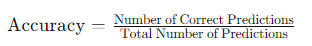

The components of the confusion matrix contribute to accuracy as follows:

True Positives (TP):

Correctly predicted positive instances contribute to accuracy.
True Negatives (TN):

Correctly predicted negative instances contribute to accuracy.
False Positives (FP):

Incorrectly predicted positive instances subtract from accuracy.
False Negatives (FN):

Incorrectly predicted negative instances subtract from accuracy.
Accuracy in Terms of Confusion Matrix Components:

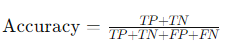

True Positives (TP):

Instances correctly predicted as positive contribute positively to accuracy.
True Negatives (TN):

Instances correctly predicted as negative contribute positively to accuracy.
False Positives (FP):

Instances incorrectly predicted as positive subtract from accuracy.
False Negatives (FN):

Instances incorrectly predicted as negative subtract from accuracy.
Key Observations:
Accuracy Measures Overall Correctness:

Accuracy considers both positive and negative predictions and provides an overall measure of correctness.
Influenced by All Components:

All components of the confusion matrix (TP, TN, FP, FN) influence accuracy.
Sensitive to Imbalanced Datasets:

In the case of imbalanced datasets (where one class dominates), accuracy may not be a sufficient metric to evaluate model performance, as it can be influenced by the dominant class.
Misleading in Imbalanced Scenarios:

In scenarios where the classes are imbalanced, a high accuracy score may not necessarily indicate a good model, especially if the model is biased toward predicting the majority class.
Limitations of Accuracy:
While accuracy is a commonly used metric, it has limitations, especially in imbalanced scenarios. In cases where one class is significantly more prevalent than the other, a model might achieve high accuracy by simply predicting the majority class, while performing poorly on the minority class.

For a more nuanced evaluation, practitioners often consider additional metrics such as precision, recall, F1 score, and area under the ROC curve (AUC-ROC), especially when class distribution is imbalanced.

In summary, accuracy provides an overall measure of correctness based on the confusion matrix components, but its interpretation should be done with caution, considering the context of the problem and potential class imbalances.

Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning
model?

Ans: A confusion matrix can be a valuable tool for identifying potential biases or limitations in a machine learning model. By carefully examining the distribution of predicted and actual class labels, practitioners can gain insights into how the model behaves across different classes and identify areas where biases or limitations may exist. Here are several ways to use a confusion matrix for this purpose:

1. Class Imbalances:

Observation:
Check for significant imbalances in the number of instances between classes.
Implication:
Class imbalances can lead to biased predictions, where the model may be more inclined to predict the majority class.
Action:
Explore techniques such as resampling, adjusting class weights, or using different evaluation metrics to account for imbalances.

2. Disproportionate Errors:

Observation:
Analyze false positives and false negatives for each class.
Implication:
Disproportionate errors may indicate that the model has challenges with specific classes, potentially due to biased training data or feature representation.
Action:
Investigate the causes of disproportionate errors, and consider strategies such as collecting more representative data or adjusting the model architecture.

3. Differential Performance:

Observation:
Compare precision and recall across different classes.
Implication:
Significant variations in precision and recall may highlight cases where the model performs well for some classes but poorly for others.
Action:
Investigate the reasons for differential performance and consider adjusting model parameters or features to address class-specific challenges.

4. Threshold Effects:

Observation:
Analyze the impact of changing classification thresholds on precision and recall.
Implication:
Threshold effects can influence the trade-off between precision and recall.
Action:
Explore different threshold values to find a balance that aligns with the desired goals and requirements.

5. Confusion Between Similar Classes:

Observation:
Identify instances where the model confuses similar classes.
Implication:
Confusion between similar classes may indicate challenges in distinguishing subtle differences in feature space.
Action:
Consider feature engineering or fine-tuning the model to better capture distinctions between similar classes.

6. Data Collection Bias:

Observation:
Examine the distribution of instances in the confusion matrix against the distribution in the training data.
Implication:
Discrepancies may indicate biases in the training data that affect the model's ability to generalize to diverse scenarios.
Action:
Evaluate the representativeness of the training data and collect additional samples if necessary to address biases.

7. Performance Disparities Across Groups:

Observation:
Analyze performance metrics for subgroups within the data (e.g., based on demographic factors).
Implication:
Disparities in performance across groups may indicate biased predictions.
Action:
Investigate potential sources of bias, including biased training data or features, and work towards mitigating biases to ensure fair predictions.

8. Monitoring Over Time:

Observation:
Monitor the confusion matrix over time as new data becomes available.
Implication:
Changes in the confusion matrix may signal shifts in the data distribution or other external factors.
Action:
Regularly update the model, reevaluate its performance, and address any emerging biases or limitations.

9. Fairness and Ethical Considerations:

Observation:
Consider fairness and ethical implications of model predictions across different groups.
Implication:
Unintended biases may lead to unfair or discriminatory outcomes.
Action:
Incorporate fairness-aware techniques, conduct fairness audits, and actively address biases to ensure ethical use of the model.

By systematically analyzing the confusion matrix and considering these factors, practitioners can gain a deeper understanding of their model's behavior and take informed steps to address potential biases or limitations. Regular model evaluation and ongoing monitoring are crucial for maintaining fairness, robustness, and effectiveness in machine learning applications.